[0, 11, 6, 60, 0, 2, 0, 4, 0, 0, 0, 0, 0, 3, 0, 5, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 4, 5, 6, 9, 10, 11, 12, 16, 17, 18, 19, 22, 24, 25, 26, 27, 28, 29, 35, 78, 80, 82, 84, 85, 86, 88, 89, 90, 92, 93, 96, 97, 106, 107, 110, 114, 115, 116, 117, 120, 121, 124, 125, 126, 128, 129, 134, 135, 138, 139, 141, 142, 143, 146, 150, 154, 155, 157, 160, 162, 168, 173, 174]


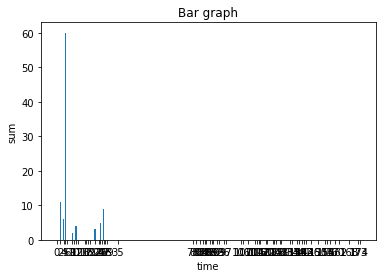

In [1]:
%matplotlib inline
import pymysql
import time
from matplotlib import pyplot as plt
config={
    "host":"127.0.0.1",
    "user":"root",
    "password":"bnwt!@#123",
    "database":"bnwt"
}
db = pymysql.connect(**config)
cursor = db.cursor()


#获取x轴管理员id
def show_manager_id(conn,cur):
    sql = "select manager_id from bnwt_pay where status=1  group by manager_id limit 0,100 "
    sta = cur.execute(sql)
    res=cur.fetchall()
    conn.commit()
    return res
res=show_manager_id(db,cursor)
x_manager=[x[0] for x in res]
x_data=[x[0]*0 for x in res]
# print(x_manager)
#获取y轴充电记录中的数据
def show_charge(conn,cur):
    sql = "select id,pay_time,manager_id from bnwt_pay where status=1 and manager_id !=0 order by id asc limit 0,100  "
    sta = cur.execute(sql)
    res=cur.fetchall()
    conn.commit()
    return res
#根据获取到的充电记录和管理员id进行相应数据处理
y_data=show_charge(db,cursor)
# print(y_data)
def data_handle(x_manager,y_data):
    count=0
    for y in y_data:
        x_count=0
        for x in x_manager:
            
            if y[2]==x:
                x_data[x_count]+=1
#                 print("%s相同 %s %s" % (count,y[2],x))
#             else:
                
# #                 print("%s不相同 %s %s" % (count,y[2],x))
            x_count+=1
data_handle(x_manager,y_data)
print(x_data)

print(x_manager)
#绘制bar图标便于分析情况
def show_bar(x_manager,x_data):
    plt.bar(x_manager, x_data, align =  'center') 
    plt.xticks(x_manager)
    plt.title('Bar graph') 
    plt.ylabel('sum') 
    plt.xlabel('time') 
    plt.show()
show_bar(x_manager,x_data)